**Nikolas Iliopoulos 1115201800332**

---



# Imports & Functions (RUN THIS FIRST)

In [280]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import torch
import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import pandas as pd
from torch import nn
pd.set_option('display.max_colwidth', None)
import string
import re
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

# function to remove urls
def remove_url(text):
    return re.sub('http[s]?://\S+', '', text)

# function to remove punctuations
def remove_punctuation(text):
    return "".join([i for i in text if i not in string.punctuation])

# function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return emoji_pattern.sub(r'', text)

# function to remove numbers
def remove_number(text):
    return "".join([i for i in text if not i.isdigit()])

# function to remove extra spaces
def remove_exrta_spaces(text):
    return " ".join(text.split())

# function for tokenization
def tokenization(text):
    return re.split(' ',text)

# function to remove stopwords from tokenized text
def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

# function for stemming
def stemming(text):
    return [porter_stemmer.stem(word) for word in text]

# function for lemmatization
def lemmatizer(text):
    return [wordnet_lemmatizer.lemmatize(word) for word in text]

def pre_process(dataset):
    dataset['proc_tweet'] = dataset['tweet']
    # removing url
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_url(x))
    # removing puntuations
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_punctuation(x))
    # removing emojis
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_emoji(x))
    # remove numbers
    # dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_number(x))
    # make lower case
    # dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: x.lower())
    # tokenization
    # remove extra spaces
    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x: remove_exrta_spaces(x))
    dataset['proc_tweet']= dataset['proc_tweet'].apply(lambda x: tokenization(x))
    # remove stopwords
    # dataset['proc_tweet']= dataset['proc_tweet'].apply(lambda x: remove_stopwords(x))
    # stemming
    # dataset['proc_tweet']=dataset['proc_tweet'].apply(lambda x: stemming(x))
    # lemmatization
    dataset['proc_tweet']=dataset['proc_tweet'].apply(lambda x: lemmatizer(x))

    dataset['proc_tweet'] = dataset['proc_tweet'].apply(lambda x:' '.join(x))
    dataset['tweet'] = dataset['proc_tweet']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Models

## Models without GloVe

### CountVectorizer & Learning Rate = 0.00001

Read data and create variables

In [95]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(min_df=0.001,lowercase=True,stop_words="english")

XTrain = vectorizer.fit_transform(XTrain)

XVal= vectorizer.transform(XVal)

Make variables into tensors

In [96]:
# Train
XTrain = torch.tensor(XTrain.toarray(),dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal.toarray(),dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 32656])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
x_Val shape: torch.Size([2282, 32656])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
y_Val shape: torch.Size([2282, 3])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])


Define Model

In [97]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, D_out)
        
    def forward(self, x):
        out = self.lin1(x)   
        return nn.functional.softmax(out,dim=1)

Create Model

In [126]:
#Define layer sizes
D_in = XTrain.shape[1]
D_out = 3

#Define Hyperparameters
learning_rate = 0.00001
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=32656, out_features=3, bias=True)
)


Train Model

In [127]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21365944027900696 F1 = 0.5078322034829019 Loss_Val = 0.20710697604550254 F1_Val = 0.5374293803023944
Epoch   1: Loss = 0.20244161117076873 F1 = 0.5464871662131766 Loss_Val = 0.19867255828446811 F1_Val = 0.5593111659187492
Epoch   2: Loss = 0.19553911221027373 F1 = 0.5594585992036205 Loss_Val = 0.1929275198943085 F1_Val = 0.5655141864112867
Epoch   3: Loss = 0.19053358751535415 F1 = 0.5664177401542022 Loss_Val = 0.18888892316155964 F1_Val = 0.5728876383527359
Epoch   4: Loss = 0.18660594427585603 F1 = 0.5707319339645907 Loss_Val = 0.1853834448589219 F1_Val = 0.5760898844988515
Epoch   5: Loss = 0.18336207735538482 F1 = 0.5762307969336201 Loss_Val = 0.1822749310069614 F1_Val = 0.582039756351305
Epoch   6: Loss = 0.18059388691186906 F1 = 0.5810624269063724 Loss_Val = 0.17971726838085386 F1_Val = 0.5854606709626327
Epoch   7: Loss = 0.17821167069673538 F1 = 0.5835741524326586 Loss_Val = 0.17750664220915902 F1_Val = 0.5877451577493611
Epoch   8: Loss = 0.1760566088557243

Plot Results

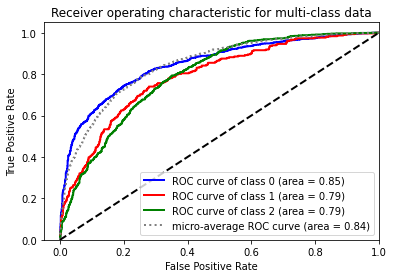

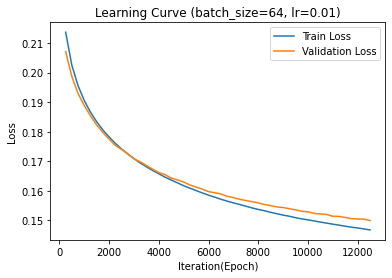

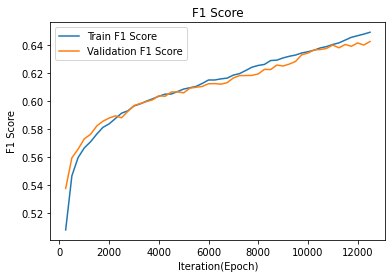

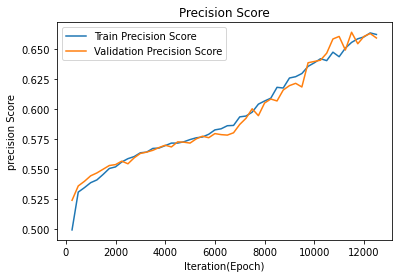

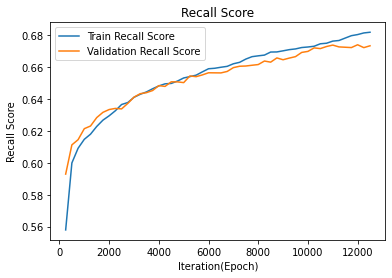

In [128]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### Learning Rate = 0.01

Read data and create variables

In [ ]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(min_df=0.001,lowercase=True,stop_words="english")

XTrain = vectorizer.fit_transform(XTrain)

XVal= vectorizer.transform(XVal)

Make variables into tensors

In [ ]:
# Train
XTrain = torch.tensor(XTrain.toarray(),dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal.toarray(),dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 32656])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
x_Val shape: torch.Size([2282, 32656])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
y_Val shape: torch.Size([2282, 3])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])


Define Model

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, D_out)
        
    def forward(self, x):
        out = self.lin1(x)   
        return nn.functional.softmax(out,dim=1)

Create Model

In [ ]:
#Define layer sizes
D_in = XTrain.shape[1]
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=32656, out_features=3, bias=True)
)


Train Model

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21365944027900696 F1 = 0.5078322034829019 Loss_Val = 0.20710697604550254 F1_Val = 0.5374293803023944
Epoch   1: Loss = 0.20244161117076873 F1 = 0.5464871662131766 Loss_Val = 0.19867255828446811 F1_Val = 0.5593111659187492
Epoch   2: Loss = 0.19553911221027373 F1 = 0.5594585992036205 Loss_Val = 0.1929275198943085 F1_Val = 0.5655141864112867
Epoch   3: Loss = 0.19053358751535415 F1 = 0.5664177401542022 Loss_Val = 0.18888892316155964 F1_Val = 0.5728876383527359
Epoch   4: Loss = 0.18660594427585603 F1 = 0.5707319339645907 Loss_Val = 0.1853834448589219 F1_Val = 0.5760898844988515
Epoch   5: Loss = 0.18336207735538482 F1 = 0.5762307969336201 Loss_Val = 0.1822749310069614 F1_Val = 0.582039756351305
Epoch   6: Loss = 0.18059388691186906 F1 = 0.5810624269063724 Loss_Val = 0.17971726838085386 F1_Val = 0.5854606709626327
Epoch   7: Loss = 0.17821167069673538 F1 = 0.5835741524326586 Loss_Val = 0.17750664220915902 F1_Val = 0.5877451577493611
Epoch   8: Loss = 0.1760566088557243

Plot Results

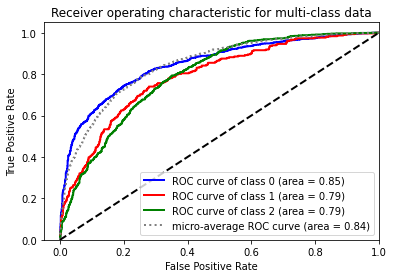

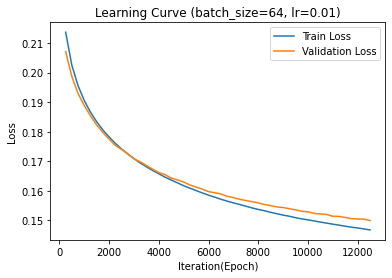

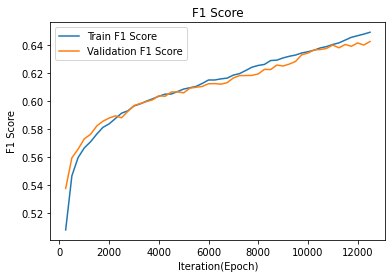

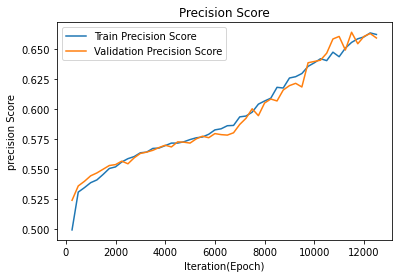

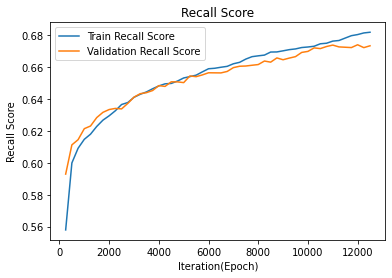

In [ ]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### min_df=0.001 stop_words="english" and lowercase=True 

Read data and create variables

In [129]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

# vectorizer = CountVectorizer()
vectorizer = CountVectorizer(min_df=0.001,lowercase=True,stop_words="english")

XTrain = vectorizer.fit_transform(XTrain)

XVal= vectorizer.transform(XVal)

Make variables into tensors

In [130]:
# Train
XTrain = torch.tensor(XTrain.toarray(),dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal.toarray(),dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
x_Val shape: torch.Size([2282, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
y_Val shape: torch.Size([2282, 3])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])


Define Model

In [131]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, D_out)
        
    def forward(self, x):
        out = self.lin1(x)   
        return nn.functional.softmax(out,dim=1)

Create Model

In [132]:
#Define layer sizes
D_in = XTrain.shape[1]
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=1524, out_features=3, bias=True)
)


Train Model

In [133]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21710595285892487 F1 = 0.4033681259800468 Loss_Val = 0.21177670028474596 F1_Val = 0.4705690721550655
Epoch   1: Loss = 0.20761260682344437 F1 = 0.48213157586102023 Loss_Val = 0.20407017320394516 F1_Val = 0.5037687776294878
Epoch   2: Loss = 0.2008232782483101 F1 = 0.5090889219052177 Loss_Val = 0.19832887707485092 F1_Val = 0.5253491451765541
Epoch   3: Loss = 0.1956572903394699 F1 = 0.5259065812821632 Loss_Val = 0.19400937027401394 F1_Val = 0.53980710753221
Epoch   4: Loss = 0.19150454986095428 F1 = 0.5489499083853784 Loss_Val = 0.19016098396645653 F1_Val = 0.5559338702980434
Epoch   5: Loss = 0.18802841025590897 F1 = 0.560343795020478 Loss_Val = 0.18705885774559444 F1_Val = 0.5684850317994463
Epoch   6: Loss = 0.18506440567970275 F1 = 0.5700482183870516 Loss_Val = 0.1845521227353149 F1_Val = 0.5716495762565347
Epoch   7: Loss = 0.18248246729373932 F1 = 0.5781541507612996 Loss_Val = 0.18239602363771862 F1_Val = 0.5788517038783381
Epoch   8: Loss = 0.18022171825170516

Plot Results

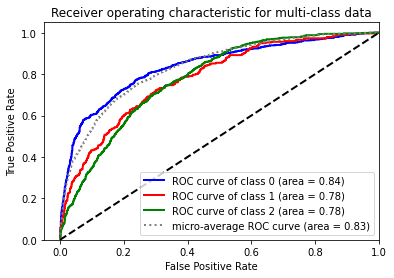

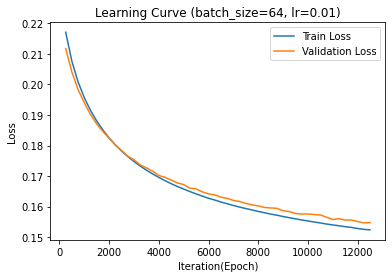

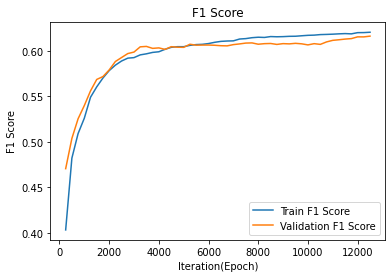

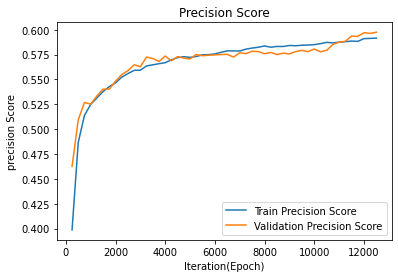

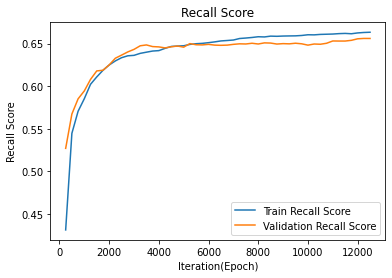

In [135]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### momentum=0.1, nesterov=True

Read data and create variables

In [136]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

# vectorizer = CountVectorizer()
vectorizer = CountVectorizer(min_df=0.001,lowercase=True,stop_words="english")

XTrain = vectorizer.fit_transform(XTrain)

XVal= vectorizer.transform(XVal)

Make variables into tensors

In [137]:
# Train
XTrain = torch.tensor(XTrain.toarray(),dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal.toarray(),dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
x_Val shape: torch.Size([2282, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
y_Val shape: torch.Size([2282, 3])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])


Define Model

In [138]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, D_out)
        
    def forward(self, x):
        out = self.lin1(x)   
        return nn.functional.softmax(out,dim=1)

Create Model

In [145]:
#Define layer sizes
D_in = XTrain.shape[1]
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.7, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=1524, out_features=3, bias=True)
)


Train Model

In [146]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.20718971318006515 F1 = 0.4673870502199321 Loss_Val = 0.1963567597170671 F1_Val = 0.5251648700470646
Epoch   1: Loss = 0.1897716560959816 F1 = 0.5521258398399836 Loss_Val = 0.18511415811048615 F1_Val = 0.5653532393747012
Epoch   2: Loss = 0.18059323632717134 F1 = 0.5797471788711869 Loss_Val = 0.17809599969122145 F1_Val = 0.5790863685141739
Epoch   3: Loss = 0.17456232446432113 F1 = 0.5923624704813584 Loss_Val = 0.1732145013908545 F1_Val = 0.5932445397104005
Epoch   4: Loss = 0.17024295920133592 F1 = 0.5972898664217711 Loss_Val = 0.16976549310816658 F1_Val = 0.6037067648375738
Epoch   5: Loss = 0.16684805035591124 F1 = 0.6015572390546674 Loss_Val = 0.16678980986277261 F1_Val = 0.6057240156913974
Epoch   6: Loss = 0.16421144062280654 F1 = 0.6078573578997031 Loss_Val = 0.16449651701582801 F1_Val = 0.6043784990233316
Epoch   7: Loss = 0.16205098271369933 F1 = 0.6107172809686826 Loss_Val = 0.16291828826069832 F1_Val = 0.605691288759473
Epoch   8: Loss = 0.1601866464912891

Plot Results

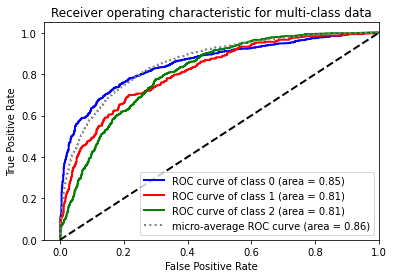

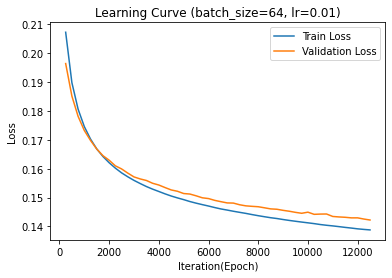

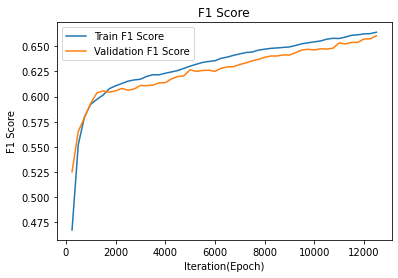

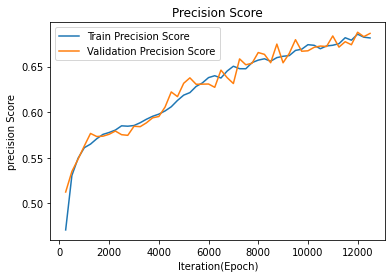

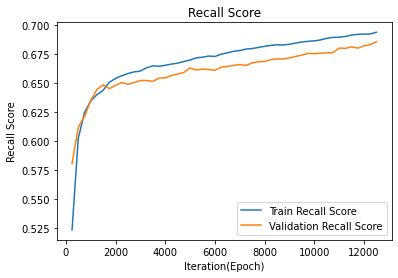

In [147]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### Experiment with the Number of Hidden Layers & relu activation function

Read data and create variables

In [174]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

# vectorizer = CountVectorizer()
vectorizer = CountVectorizer(min_df=0.001,lowercase=True,stop_words="english")

XTrain = vectorizer.fit_transform(XTrain)

XVal= vectorizer.transform(XVal)

Make variables into tensors

In [175]:
# Train
XTrain = torch.tensor(XTrain.toarray(),dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal.toarray(),dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
x_Val shape: torch.Size([2282, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
y_Val shape: torch.Size([2282, 3])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])


Define Model

In [192]:
class Net(nn.Module):
    def __init__(self, D_in,H1,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, H2)
        self.lin3 = nn.Linear(H2, H3)
        self.lin4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.relu(self.lin2(out))
        out = nn.functional.relu(self.lin3(out))

        return nn.functional.softmax(self.lin4(out),dim=1)

Create Model

In [194]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 200
H2 = 100
H3 = 50
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in,H1,H2,H3, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.7, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=1524, out_features=200, bias=True)
  (lin2): Linear(in_features=200, out_features=100, bias=True)
  (lin3): Linear(in_features=100, out_features=50, bias=True)
  (lin4): Linear(in_features=50, out_features=3, bias=True)
)


Train Model

In [195]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21450442063808442 F1 = 0.2998068423165321 Loss_Val = 0.20751205210884413 F1_Val = 0.2996911310329779
Epoch   1: Loss = 0.20496259558200836 F1 = 0.29960737557998407 Loss_Val = 0.20318854310446316 F1_Val = 0.30022279780590294
Epoch   2: Loss = 0.2023981990814209 F1 = 0.29992770540230074 Loss_Val = 0.20168569684028625 F1_Val = 0.29909081236507007
Epoch   3: Loss = 0.20140540540218355 F1 = 0.299988168228943 Loss_Val = 0.20122860827379757 F1_Val = 0.2992693861409822
Epoch   4: Loss = 0.20094036734104156 F1 = 0.29978353504625355 Loss_Val = 0.20087529801660114 F1_Val = 0.29814978972824163
Epoch   5: Loss = 0.2007156499028206 F1 = 0.2995865302345117 Loss_Val = 0.20061740734510952 F1_Val = 0.3000992087557781
Epoch   6: Loss = 0.20050897467136383 F1 = 0.29970927443458795 Loss_Val = 0.2002980059219731 F1_Val = 0.3002992960946659
Epoch   7: Loss = 0.20033495306968688 F1 = 0.2999005128893579 Loss_Val = 0.20030775749021107 F1_Val = 0.29992963000878325
Epoch   8: Loss = 0.20016164

Plot Results

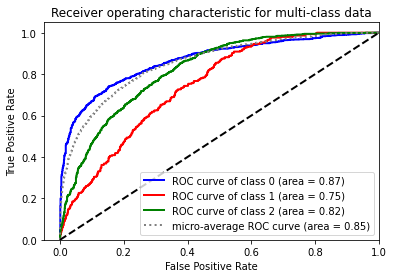

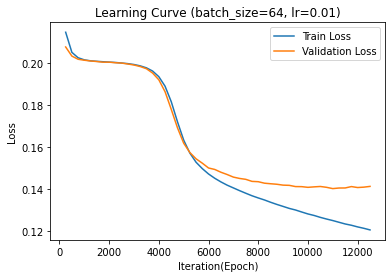

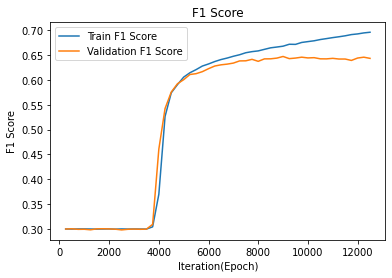

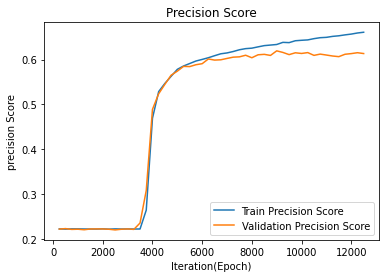

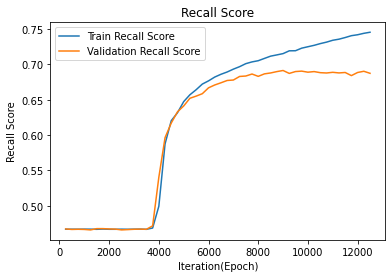

In [196]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### Cross Entropy Loss

Read data and create variables

In [201]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

# vectorizer = CountVectorizer()
vectorizer = CountVectorizer(min_df=0.001,lowercase=True,stop_words="english")

XTrain = vectorizer.fit_transform(XTrain)

XVal= vectorizer.transform(XVal)

Make variables into tensors

In [202]:
# Train
XTrain = torch.tensor(XTrain.toarray(),dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal.toarray(),dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
x_Val shape: torch.Size([2282, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
y_Val shape: torch.Size([2282, 3])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])


Define Model

In [210]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, D_out)

    def forward(self, x):
        out = self.lin1(x)
        return out

Create Model

In [216]:
#Define layer sizes
D_in = XTrain.shape[1]
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in, D_out)
print(model)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.7, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=1524, out_features=3, bias=True)
)


Train Model

In [217]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    y_pred = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    y_pred = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.9358749885559082 F1 = 0.5617280065220144 Loss_Val = 0.8712876124514474 F1_Val = 0.6039044098263049
Epoch   1: Loss = 0.8417400362491607 F1 = 0.6020427590863671 Loss_Val = 0.8245664288600286 F1_Val = 0.609767652417928
Epoch   2: Loss = 0.8055859961509705 F1 = 0.6121633774913315 Loss_Val = 0.7981670482291116 F1_Val = 0.6161513070666362
Epoch   3: Loss = 0.7839434094429016 F1 = 0.6211649393855291 Loss_Val = 0.7826004591253068 F1_Val = 0.62124225725477
Epoch   4: Loss = 0.7684644045829773 F1 = 0.6303801213999372 Loss_Val = 0.7699248095353445 F1_Val = 0.6270145143334437
Epoch   5: Loss = 0.7568569240570069 F1 = 0.6354404063978095 Loss_Val = 0.7609788162840737 F1_Val = 0.6341523944436526
Epoch   6: Loss = 0.7476917788982391 F1 = 0.639795517205891 Loss_Val = 0.7526705728636848 F1_Val = 0.6431932412727579
Epoch   7: Loss = 0.7400271847248078 F1 = 0.644780586226606 Loss_Val = 0.7450817657841576 F1_Val = 0.6499830613780584
Epoch   8: Loss = 0.7332810158729554 F1 = 0.650561176

Plot Results

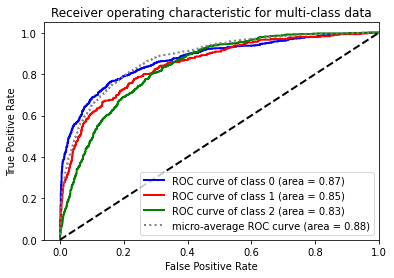

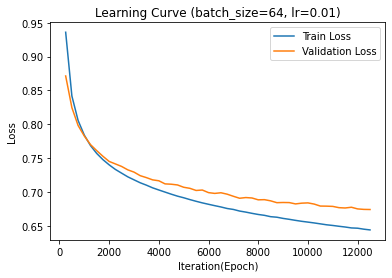

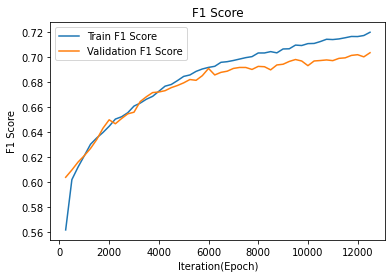

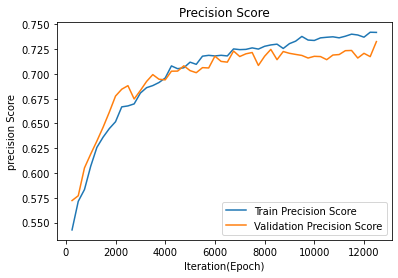

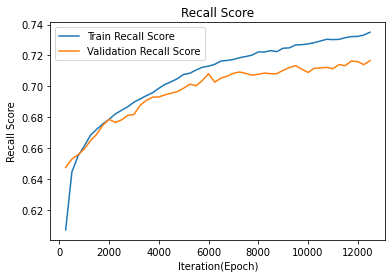

In [218]:
y_pred = model(XVal)
y_pred = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### TfidfVectorizer

Read data and create variables

In [225]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(strip_accents='unicode',ngram_range=(1, 1),min_df=0.001,stop_words=text.ENGLISH_STOP_WORDS, lowercase=True)

XTrain = vectorizer.fit_transform(XTrain)

XVal= vectorizer.transform(XVal)

Make variables into tensors

In [226]:
# Train
XTrain = torch.tensor(XTrain.toarray(),dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal.toarray(),dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
x_Val shape: torch.Size([2282, 1524])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])
y_Val shape: torch.Size([2282, 3])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])


Define Model

In [227]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, D_out)

    def forward(self, x):
        out = self.lin1(x)
        return nn.functional.softmax(out,dim=1)

Create Model

In [228]:
#Define layer sizes
D_in = XTrain.shape[1]
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in, D_out)
print(model)
loss_func = nn.MSELoss()
# loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.7, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=1524, out_features=3, bias=True)
)


Train Model

In [229]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # y_pred = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # y_pred = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21360014861822127 F1 = 0.330955630171813 Loss_Val = 0.20746491559677654 F1_Val = 0.2989970770635668
Epoch   1: Loss = 0.20445575505495073 F1 = 0.29925688638950987 Loss_Val = 0.2025553575820393 F1_Val = 0.29771076961401005
Epoch   2: Loss = 0.20084641379117965 F1 = 0.2994325877512726 Loss_Val = 0.19985375801722208 F1_Val = 0.3005200098420827
Epoch   3: Loss = 0.19879090708494188 F1 = 0.30372639626754505 Loss_Val = 0.19843231845233175 F1_Val = 0.3031173716426035
Epoch   4: Loss = 0.19729428774118424 F1 = 0.3158634606481635 Loss_Val = 0.19712004024121496 F1_Val = 0.30687837074097096
Epoch   5: Loss = 0.19608775663375855 F1 = 0.32650923777147667 Loss_Val = 0.19614927015370792 F1_Val = 0.3228968736387223
Epoch   6: Loss = 0.19496020275354387 F1 = 0.34850478097899934 Loss_Val = 0.19498626266916594 F1_Val = 0.3540723589964437
Epoch   7: Loss = 0.1939196999669075 F1 = 0.3833221612667667 Loss_Val = 0.1941763050854206 F1_Val = 0.37996646729559785
Epoch   8: Loss = 0.192999870

Plot Results

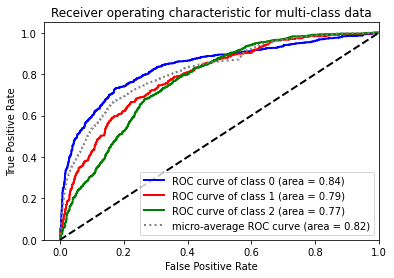

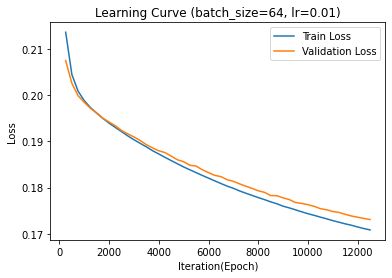

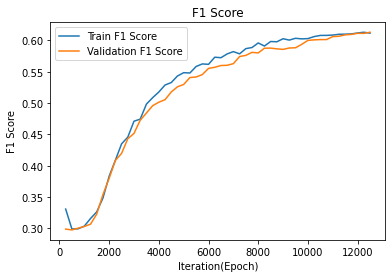

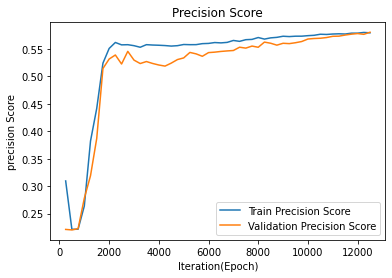

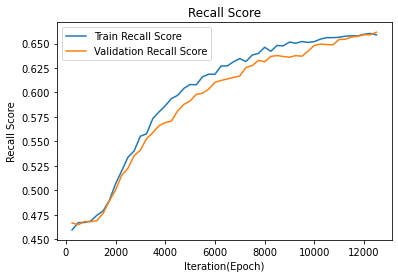

In [230]:
y_pred = model(XVal)
# y_pred = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

## Models with GloVe

### MSELoss, 300d

Downloading GloVe and creating dictionary

In [292]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [293]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [294]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [299]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, D_out)
        
    def forward(self, x):
        out = self.lin1(x)

        return nn.functional.softmax(out,dim=1)

Create Model

In [300]:
#Define layer sizes
D_in = XTrain.shape[1]
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 50
#Initialize model, loss, optimizer
model = Net(D_in, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=3, bias=True)
)


Train Model

In [301]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.20777420634031296 F1 = 0.5176810483763777 Loss_Val = 0.2542886833349864 F1_Val = 0.46301663153156447
Epoch   1: Loss = 0.19166060948371888 F1 = 0.5595995427775763 Loss_Val = 0.181394559227758 F1_Val = 0.5820928326801742
Epoch   2: Loss = 0.18978095638751985 F1 = 0.5650275761850555 Loss_Val = 0.19778238981962204 F1_Val = 0.5188267640655979
Epoch   3: Loss = 0.18614490967988967 F1 = 0.5663951249514863 Loss_Val = 0.1775364987552166 F1_Val = 0.5934013212994599
Epoch   4: Loss = 0.17658781105279922 F1 = 0.5812950005965732 Loss_Val = 0.16784004204803044 F1_Val = 0.6136693835151725
Epoch   5: Loss = 0.173033836632967 F1 = 0.5933098319034055 Loss_Val = 0.17719837981793615 F1_Val = 0.5816690782926099
Epoch   6: Loss = 0.17204890406131745 F1 = 0.5946944688273842 Loss_Val = 0.1639879590107335 F1_Val = 0.6066260604567837
Epoch   7: Loss = 0.17062233212590217 F1 = 0.6013837474614034 Loss_Val = 0.16403204078475633 F1_Val = 0.6163346342770573
Epoch   8: Loss = 0.1706412900686264 F

Plot Results

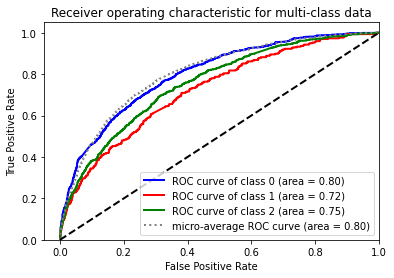

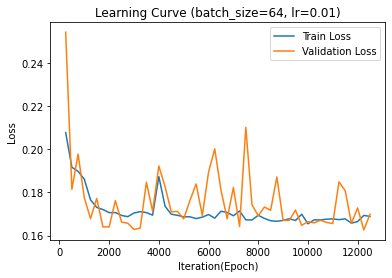

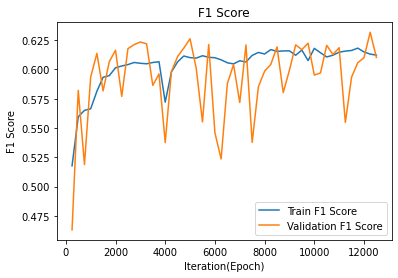

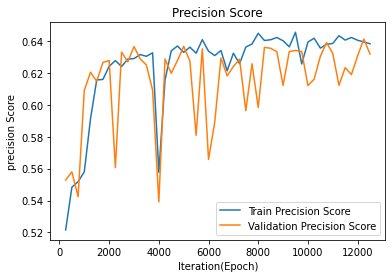

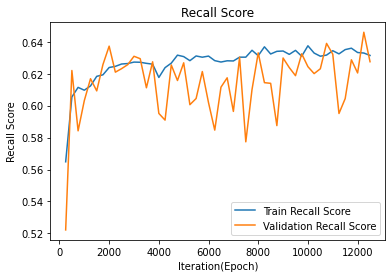

In [302]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### 1 Hidden Layer, learning rate = 0.0001, epoch = 100

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [ ]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [ ]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, D_out)
        
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))

        return nn.functional.softmax(self.lin2(out),dim=1)

Create Model

In [ ]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=600, bias=True)
  (lin2): Linear(in_features=600, out_features=3, bias=True)
)


Train Model

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21723126339912416 F1 = 0.41762750419180866 Loss_Val = 0.20583617976970142 F1_Val = 0.46055565691208206
Epoch   1: Loss = 0.20243943548202514 F1 = 0.4942045362421196 Loss_Val = 0.20105096366670397 F1_Val = 0.4868512045931655
Epoch   2: Loss = 0.1983738835453987 F1 = 0.5217341562570161 Loss_Val = 0.1976226448184914 F1_Val = 0.5057774101529663
Epoch   3: Loss = 0.19531121718883515 F1 = 0.5339859192789844 Loss_Val = 0.19473801636033589 F1_Val = 0.5232795030458075
Epoch   4: Loss = 0.19290158593654633 F1 = 0.5412206812318101 Loss_Val = 0.19280685732762018 F1_Val = 0.5303687519229394
Epoch   5: Loss = 0.1910333691239357 F1 = 0.5474985242725924 Loss_Val = 0.1912590985496839 F1_Val = 0.5340114479760026
Epoch   6: Loss = 0.18945946449041368 F1 = 0.5519457331576612 Loss_Val = 0.18958820733759138 F1_Val = 0.5418636489928114
Epoch   7: Loss = 0.18804379069805147 F1 = 0.5553933445187479 Loss_Val = 0.18805249200926888 F1_Val = 0.5453901445175897
Epoch   8: Loss = 0.18682470458745

Plot Results

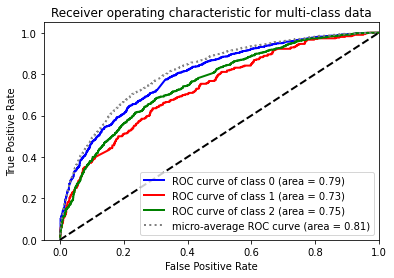

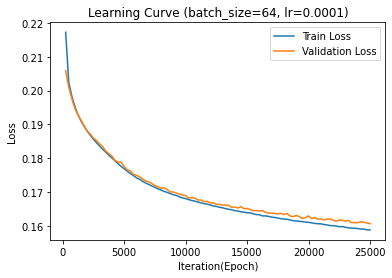

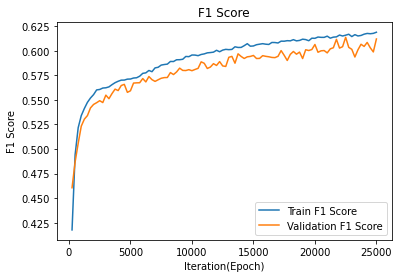

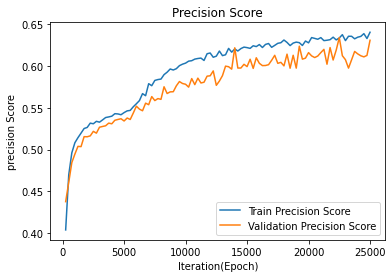

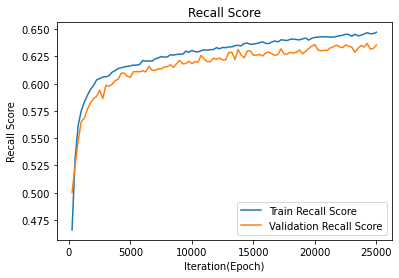

In [ ]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### 2 Hidden Layer, learning rate = 0.0001, epoch = 100

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [318]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [319]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [320]:
class Net(nn.Module):
    def __init__(self, D_in, H1,H2, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, H2)
        self.lin3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.relu(self.lin2(out))

        return nn.functional.softmax(self.lin3(out),dim=1)

Create Model

In [321]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
H2 = 150
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, H2,D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin2): Linear(in_features=300, out_features=150, bias=True)
  (lin3): Linear(in_features=150, out_features=3, bias=True)
)


Train Model

In [322]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

KeyboardInterrupt: ignored

Plot Results

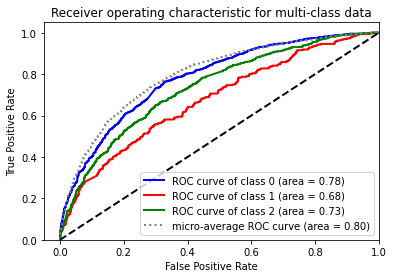

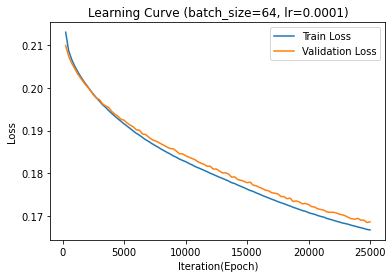

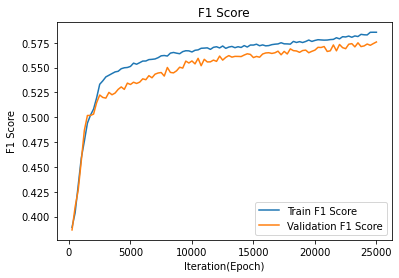

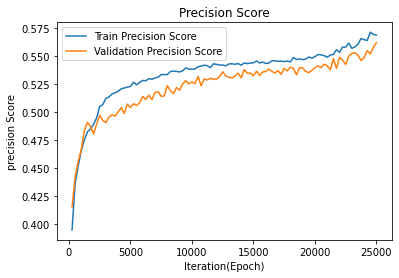

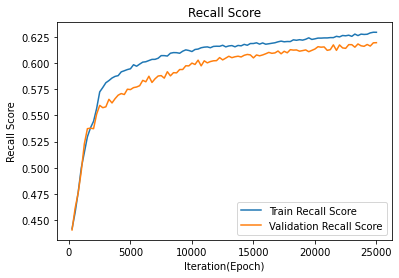

In [312]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### 3 Hidden Layer, learning rate = 0.0001, epoch = 100

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [323]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [324]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [325]:
class Net(nn.Module):
    def __init__(self, D_in, H1,H2,H3, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, H2)
        self.lin3 = nn.Linear(H2, H3)
        self.lin4 = nn.Linear(H3, D_out)
        
    def forward(self, x):
        out = nn.functional.relu(self.lin1(x))
        out = nn.functional.relu(self.lin2(out))
        out = nn.functional.relu(self.lin3(out))

        return nn.functional.softmax(self.lin4(out),dim=1)

Create Model

In [326]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
H2 = 200
H3 = 100
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, H2, H3,D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin2): Linear(in_features=300, out_features=200, bias=True)
  (lin3): Linear(in_features=200, out_features=100, bias=True)
  (lin4): Linear(in_features=100, out_features=3, bias=True)
)


Train Model

In [327]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21997878241539 F1 = 0.42172878284732046 Loss_Val = 0.21774818748235703 F1_Val = 0.441166104840225
Epoch   1: Loss = 0.21584640944004058 F1 = 0.45261124793252555 Loss_Val = 0.21460153659184775 F1_Val = 0.44120185950991586
Epoch   2: Loss = 0.2132583174109459 F1 = 0.45391784866852525 Loss_Val = 0.2124237430592378 F1_Val = 0.44122507582589443
Epoch   3: Loss = 0.2115288879275322 F1 = 0.45185197613501726 Loss_Val = 0.21094164210889074 F1_Val = 0.4449962677280669
Epoch   4: Loss = 0.21022256618738175 F1 = 0.4583359705996014 Loss_Val = 0.20987091420425308 F1_Val = 0.4501194370533655
Epoch   5: Loss = 0.2091843698620796 F1 = 0.4624471325050836 Loss_Val = 0.2089251321223047 F1_Val = 0.45595631490392446
Epoch   6: Loss = 0.20833703202009202 F1 = 0.46915575376122126 Loss_Val = 0.20820813667443064 F1_Val = 0.46434572296023074
Epoch   7: Loss = 0.20762834095954896 F1 = 0.47180413190947534 Loss_Val = 0.2074211012158129 F1_Val = 0.4669039263692753
Epoch   8: Loss = 0.207014440715

Plot Results

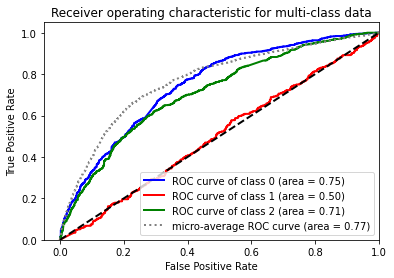

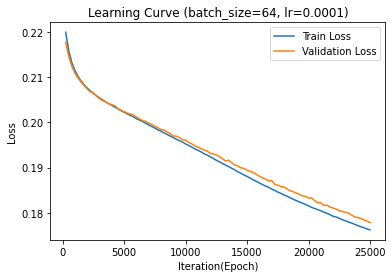

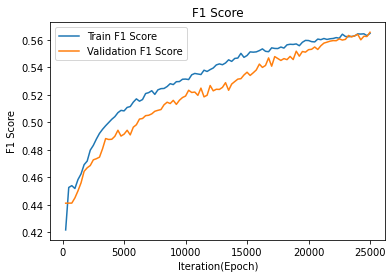

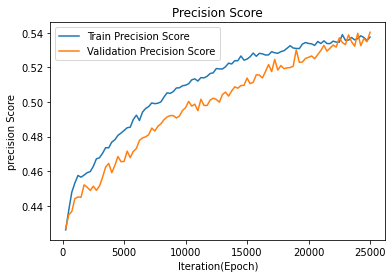

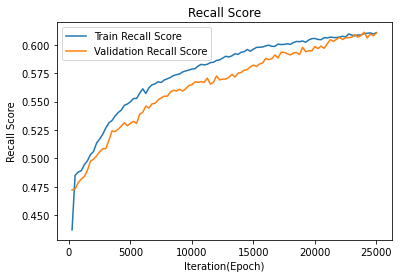

In [328]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### activation relu -> sigmoid

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [331]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [332]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [360]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, D_out)
        
    def forward(self, x):
        out = torch.sigmoid(self.lin1(x))

        return nn.functional.softmax(self.lin2(out),dim=1)

Create Model

In [361]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
D_out = 3

#Define Hyperparameters
learning_rate = 0.0001
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin2): Linear(in_features=300, out_features=3, bias=True)
)


Train Model

In [362]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.20627451413869857 F1 = 0.34173125776257796 Loss_Val = 0.20280512298146883 F1_Val = 0.37319944160566443
Epoch   1: Loss = 0.201303308904171 F1 = 0.394994556523494 Loss_Val = 0.20009110371271768 F1_Val = 0.42178298299001943
Epoch   2: Loss = 0.19925395238399507 F1 = 0.43455445225854067 Loss_Val = 0.1985158808529377 F1_Val = 0.4337590766472044
Epoch   3: Loss = 0.19781718224287034 F1 = 0.4554743632927579 Loss_Val = 0.19712449237704277 F1_Val = 0.45895071474383653
Epoch   4: Loss = 0.19664267575740815 F1 = 0.46864315179847993 Loss_Val = 0.19584125818477738 F1_Val = 0.4776123299903048
Epoch   5: Loss = 0.19574205881357193 F1 = 0.48088914161441587 Loss_Val = 0.19485212862491608 F1_Val = 0.4927725484939468
Epoch   6: Loss = 0.19493233150243758 F1 = 0.48640136803111 Loss_Val = 0.19450643037756285 F1_Val = 0.48914738361478904
Epoch   7: Loss = 0.19423133224248887 F1 = 0.49132419719470105 Loss_Val = 0.19376817676756117 F1_Val = 0.49327190190176595
Epoch   8: Loss = 0.19358327

Plot Results

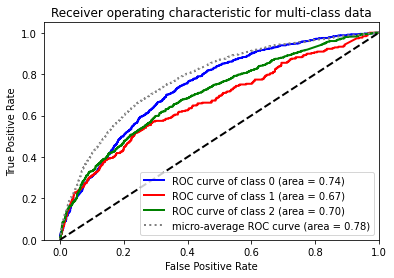

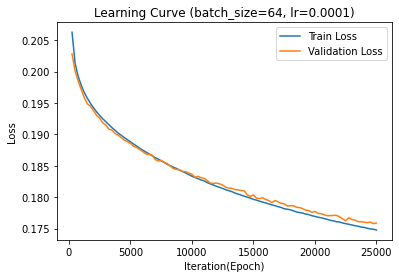

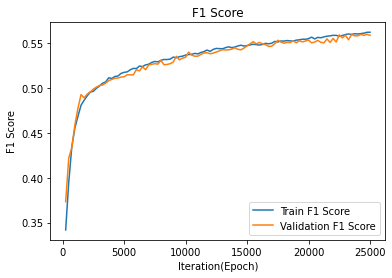

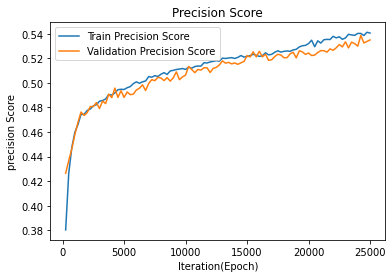

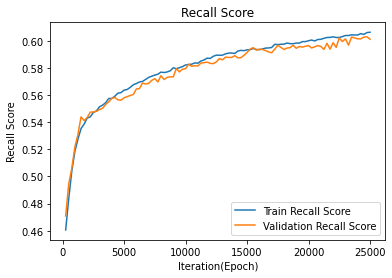

In [363]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### learning rate from 0.0001 to 0.001

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [364]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [365]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [366]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, D_out)
        
    def forward(self, x):
        out = torch.sigmoid(self.lin1(x))

        return nn.functional.softmax(self.lin2(out),dim=1)

Create Model

In [373]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
D_out = 3

#Define Hyperparameters
learning_rate = 0.001
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin2): Linear(in_features=300, out_features=3, bias=True)
)


Train Model

In [374]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.19738606613874435 F1 = 0.4619726920790178 Loss_Val = 0.19291982841160563 F1_Val = 0.48499628365056285
Epoch   1: Loss = 0.19083350348472594 F1 = 0.5082197923776426 Loss_Val = 0.18931655834118524 F1_Val = 0.503166398384788
Epoch   2: Loss = 0.187809179186821 F1 = 0.5220907304738074 Loss_Val = 0.1866075980166594 F1_Val = 0.5179007559945215
Epoch   3: Loss = 0.18536929136514663 F1 = 0.530064398759011 Loss_Val = 0.18473941211899123 F1_Val = 0.5251084114510434
Epoch   4: Loss = 0.18338656663894654 F1 = 0.5380089868749295 Loss_Val = 0.1830157157447603 F1_Val = 0.5284581010916196
Epoch   5: Loss = 0.18151220899820328 F1 = 0.5436296347567979 Loss_Val = 0.18179209447569317 F1_Val = 0.5342630520673303
Epoch   6: Loss = 0.18005329966545106 F1 = 0.5475523480658592 Loss_Val = 0.18026268399424022 F1_Val = 0.5378296492544189
Epoch   7: Loss = 0.17870155984163286 F1 = 0.5497202986914819 Loss_Val = 0.17930257692933083 F1_Val = 0.5377658453105219
Epoch   8: Loss = 0.17749950683116913

Plot Results

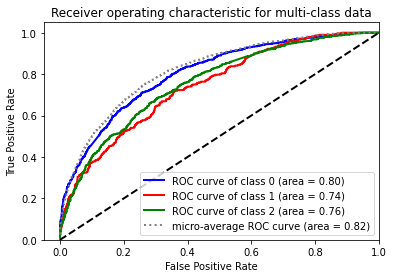

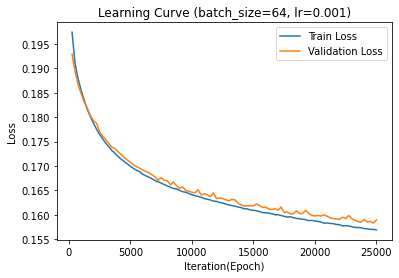

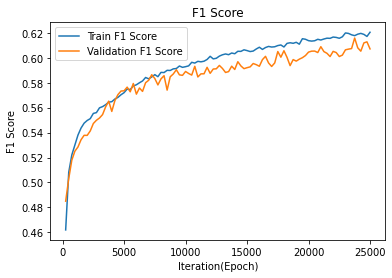

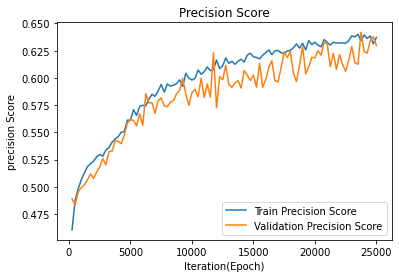

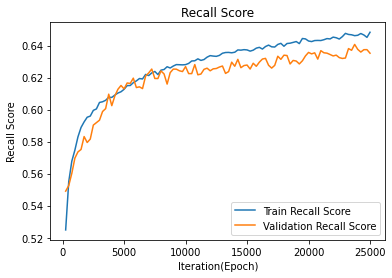

In [375]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### optimizer SGD -> ASGD

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [376]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [377]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [378]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, D_out)
        
    def forward(self, x):
        out = torch.sigmoid(self.lin1(x))

        return nn.functional.softmax(self.lin2(out),dim=1)

Create Model

In [380]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
D_out = 3

#Define Hyperparameters
learning_rate = 0.001
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin2): Linear(in_features=300, out_features=3, bias=True)
)


Train Model

In [381]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.21138208091259003 F1 = 0.3583300916502432 Loss_Val = 0.20259449548191494 F1_Val = 0.3675225980610002
Epoch   1: Loss = 0.20089262396097182 F1 = 0.37782409738827655 Loss_Val = 0.19903301323453584 F1_Val = 0.4324560979334127
Epoch   2: Loss = 0.19858563095331191 F1 = 0.42745373199345904 Loss_Val = 0.19732693003283608 F1_Val = 0.46744890355860097
Epoch   3: Loss = 0.19718843191862107 F1 = 0.4612063181421843 Loss_Val = 0.19619511688748995 F1_Val = 0.46967200779864904
Epoch   4: Loss = 0.1961501299738884 F1 = 0.47037518609131823 Loss_Val = 0.19525934383273125 F1_Val = 0.48490568584959004
Epoch   5: Loss = 0.1952773505449295 F1 = 0.483360466433991 Loss_Val = 0.1941363289952278 F1_Val = 0.4865538327172201
Epoch   6: Loss = 0.19455773997306824 F1 = 0.48695410352858853 Loss_Val = 0.1937681862877475 F1_Val = 0.4874328085143844
Epoch   7: Loss = 0.19388144093751908 F1 = 0.49219591786498024 Loss_Val = 0.1931307754582829 F1_Val = 0.49471663194213467
Epoch   8: Loss = 0.193326112

Plot Results

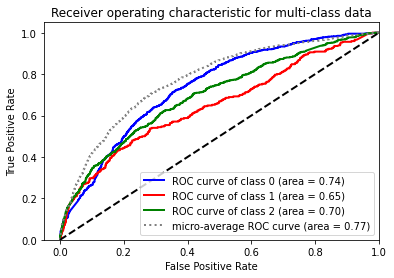

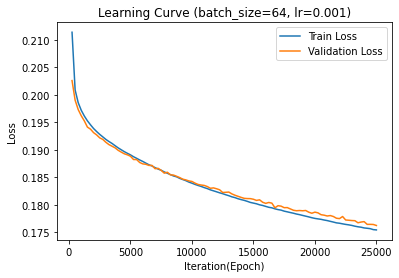

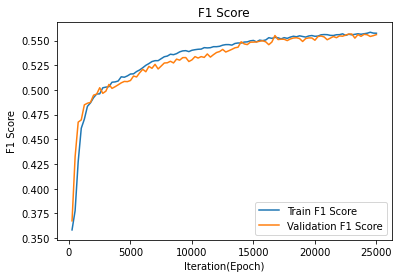

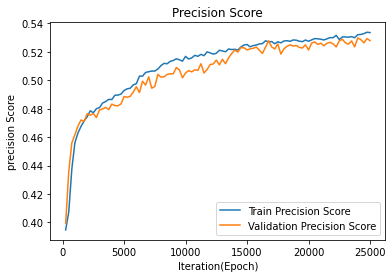

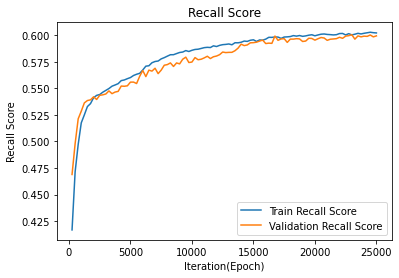

In [382]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### learning rate from 0.001 to 0.01

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [ ]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [ ]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, D_out)
        
    def forward(self, x):
        out = torch.sigmoid(self.lin1(x))

        return nn.functional.softmax(self.lin2(out),dim=1)

Create Model

In [383]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin2): Linear(in_features=300, out_features=3, bias=True)
)


Train Model

In [384]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.19737583208084106 F1 = 0.45902571395231495 Loss_Val = 0.19351467862725258 F1_Val = 0.46943373184232595
Epoch   1: Loss = 0.19109221279621125 F1 = 0.5028715405848609 Loss_Val = 0.18969542988472515 F1_Val = 0.512610611647703
Epoch   2: Loss = 0.18785161823034285 F1 = 0.5190788320816855 Loss_Val = 0.18712222327788672 F1_Val = 0.5181268010558218
Epoch   3: Loss = 0.18518418937921524 F1 = 0.531735756754152 Loss_Val = 0.1847459359301461 F1_Val = 0.5304459966647566
Epoch   4: Loss = 0.1829183213710785 F1 = 0.5398611650687303 Loss_Val = 0.1829085966779126 F1_Val = 0.5371637794919959
Epoch   5: Loss = 0.18111179089546203 F1 = 0.5425924349821694 Loss_Val = 0.1812990407148997 F1_Val = 0.5408217623540863
Epoch   6: Loss = 0.179509093105793 F1 = 0.5483779378701427 Loss_Val = 0.1797239486542013 F1_Val = 0.5464128271407757
Epoch   7: Loss = 0.17798994642496108 F1 = 0.5510875349522822 Loss_Val = 0.17845289616121185 F1_Val = 0.5489719057641579
Epoch   8: Loss = 0.1768549293279648 F1

Plot Results

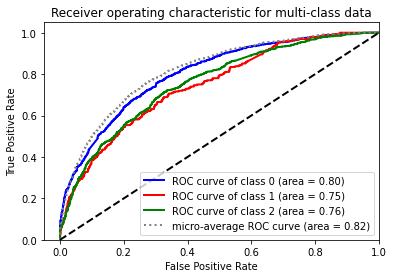

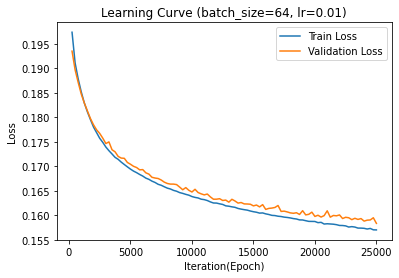

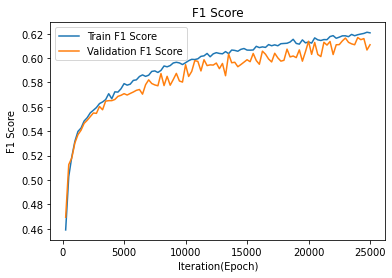

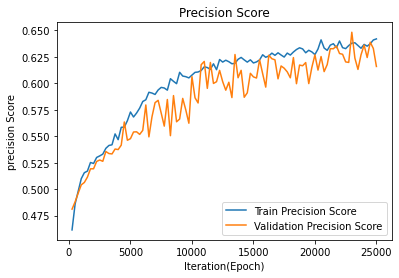

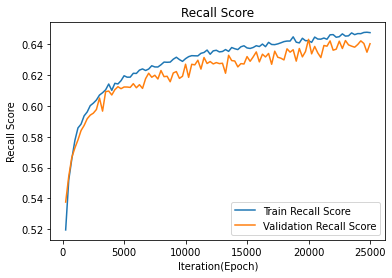

In [385]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

### GloVe.6B.50d.txt

Downloading GloVe and creating dictionary

In [387]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.50d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [388]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,50]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,50])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [389]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 50])
tensor([[-2.1642,  1.8993,  1.2484,  ..., -2.0032, -0.1710,  0.4829],
        [ 6.6816,  0.5238,  1.3165,  ...,  0.5363, -2.0285,  3.6617],
        [ 2.6003,  0.2517,  0.9428,  ..., -1.3659, -0.1229,  2.3426],
        ...,
        [ 0.7089,  1.0450,  0.7007,  ..., -0.2809, -0.3744, -0.4541],
        [ 3.2566,  1.7737,  1.5871,  ...,  1.1016, -0.5834,  1.1596],
        [ 8.1455, -2.0829,  1.9835,  ...,  2.3711, -1.0961,  0.0274]])
x_Val shape: torch.Size([2282, 50])
tensor([[ 1.4720e+01, -3.3100e+00,  2.5408e+00,  ..., -2.1756e-01,
         -4.5888e+00, -8.7662e+00],
        [ 4.4258e+00,  2.4375e+00, -1.2957e+00,  ..., -5.5100e-03,
         -2.7052e+00, -2.5375e+00],
        [ 3.2985e+00, -1.8369e+00,  5.1210e-01,  ..., -1.0050e-01,
         -1.2231e+00,  3.9712e-01],
        ...,
        [ 1.9987e+00, -1.1879e-01,  9.6823e-01,  ..., -7.6358e-01,
         -1.0884e-01,  9.4758e-01],
        [ 5.0377e+00,  1.4146e+00,  7.7175e-01,  ..., -1.1053e+00,
     

Define Model

In [390]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, D_out)
        
    def forward(self, x):
        out = torch.sigmoid(self.lin1(x))

        return nn.functional.softmax(self.lin2(out),dim=1)

Create Model

In [394]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 50
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=50, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=3, bias=True)
)


Train Model

In [395]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.20367193698883057 F1 = 0.39717480636172636 Loss_Val = 0.19890523039632374 F1_Val = 0.39256290714369796
Epoch   1: Loss = 0.19763028824329376 F1 = 0.4516984564501002 Loss_Val = 0.195982919798957 F1_Val = 0.4750470511629364
Epoch   2: Loss = 0.19547833877801896 F1 = 0.4836874002860681 Loss_Val = 0.1943821261326472 F1_Val = 0.4892128373709091
Epoch   3: Loss = 0.1938073151707649 F1 = 0.4922031974205002 Loss_Val = 0.19289221531814998 F1_Val = 0.49552102432442
Epoch   4: Loss = 0.19246434730291367 F1 = 0.4979092618429816 Loss_Val = 0.19175765125287902 F1_Val = 0.49791029171068224
Epoch   5: Loss = 0.19125094193220138 F1 = 0.5056600431936539 Loss_Val = 0.19087758867277038 F1_Val = 0.4986627583680236
Epoch   6: Loss = 0.19019238901138305 F1 = 0.5090621183092193 Loss_Val = 0.19027054930726686 F1_Val = 0.4981829624970681
Epoch   7: Loss = 0.18931598514318465 F1 = 0.5146638656929415 Loss_Val = 0.18943206552002165 F1_Val = 0.5048168972400577
Epoch   8: Loss = 0.188501021802425

Plot Results

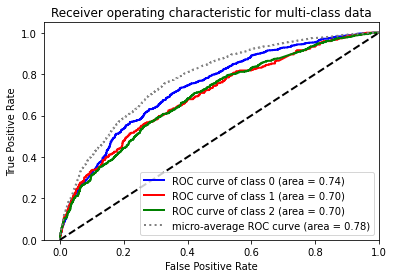

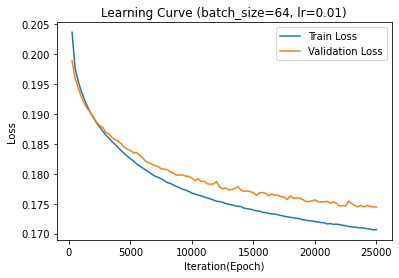

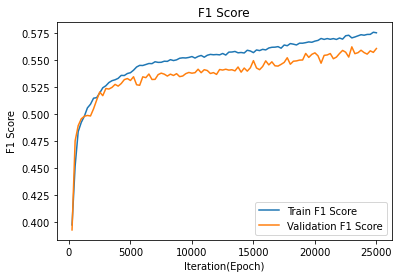

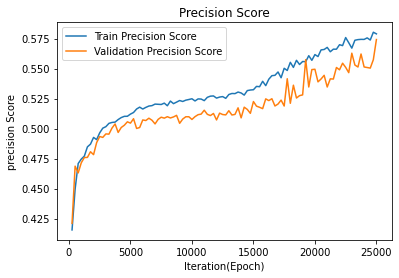

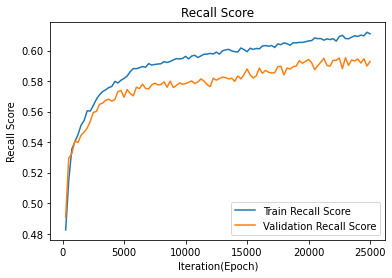

In [396]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()

## Final Model

**Specifications**
- GloVe 300d
- 1 Hidden Layer with 300 neurons
- learning rate = 0.01
- optimizer ASGD
- activation sigmoid
- epoch 100
- batch size 64
- loss function MSELoss

Downloading GloVe and creating dictionary

In [ ]:
#  -- Download GloVe Files --
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

# file path for glove file
glovePath = "/content/glove.6B.300d.txt"

# creating dictionary
glove = pd.read_csv(glovePath, sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

Using glove

In [ ]:
from numpy.ma.core import concatenate
# reading the train csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_train_set.csv')
# reading the validation csv
data_Val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSets/vaccine_validation_set.csv')

# pre processing the data['tweet']
# pre_process(data)
# pre processing the data_Val['tweet']
# pre_process(data_Val)

def create_array(tweet):
  return re.split(' ',tweet)

def transform(tweet):
  array = np.array(np.zeros([1,300]))
  for word in tweet:
    if word not in glove_embedding:
      ar = np.zeros([1,300])
    else:
      ar = np.array([glove_embedding.get(word)])
    array = np.concatenate((array,ar))
  return array

def sum_array(tweet):
  return np.sum(tweet, axis=0)

# tranform the sentence of words to a 1x50 array using the glove

data['tweet'] = data['tweet'].apply(lambda tweet:create_array(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:transform(tweet))
data['tweet'] = data['tweet'].apply(lambda tweet:sum_array(tweet))

data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:create_array(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:transform(tweet))
data_Val['tweet'] = data_Val['tweet'].apply(lambda tweet:sum_array(tweet))

# split to variables
XTrain = data['tweet']
XVal = data_Val['tweet']
YTrain = data['label']
YVal = data_Val['label']

Make variables into tensors

In [ ]:
# Train
XTrain = torch.tensor(XTrain,dtype=torch.float)

YTrain = torch.tensor(YTrain,dtype=torch.float)
YTrain = YTrain.to(torch.long)
YTrain = torch.nn.functional.one_hot(YTrain,num_classes=3)
YTrain = YTrain.float()
# Validation
XVal = torch.tensor(XVal,dtype=torch.float)

YVal = torch.tensor(YVal,dtype=torch.float)
YVal = YVal.to(torch.long)
YVal = torch.nn.functional.one_hot(YVal,num_classes=3)
YVal = YVal.float()

print(f"x shape: {XTrain.shape}")
print(XTrain)
print(f"x_Val shape: {XVal.shape}")
print(XVal)
print(f"y shape: {YTrain.shape}")
print(YTrain)
print(f"y_Val shape: {YVal.shape}")
print(YVal)

x shape: torch.Size([15976, 300])
tensor([[-0.8083, -0.9641,  0.2995,  ..., -0.7649,  0.9978, -0.1524],
        [-2.4406,  2.2821, -1.1867,  ..., -3.1162, -0.4994,  1.4848],
        [-1.1347,  1.0569, -1.5639,  ..., -4.1441, -0.8006,  0.6040],
        ...,
        [-1.5591,  0.3572, -0.0653,  ..., -0.5557, -0.3443, -0.5218],
        [-2.0982, -0.0227, -0.6708,  ..., -1.3594, -0.1582,  0.4155],
        [-3.2859,  2.4037, -2.8620,  ..., -3.3955, -1.3219, -0.2580]])
x_Val shape: torch.Size([2282, 300])
tensor([[-3.9054,  4.9588, -2.2344,  ..., -5.5079, -3.3599, -2.2862],
        [-3.1600,  1.4749, -0.1204,  ..., -3.2207, -1.6309, -0.7526],
        [-1.8616,  1.1339, -0.1907,  ..., -1.9034,  0.1644, -0.9679],
        ...,
        [-1.6379,  1.2905, -1.4810,  ..., -2.1567, -0.6946, -0.5249],
        [-1.8117,  0.8547, -0.2889,  ..., -2.5761, -1.5260,  1.3426],
        [-2.7005,  1.7576, -1.4774,  ..., -2.0370,  0.1461,  1.9939]])
y shape: torch.Size([15976, 3])
tensor([[1., 0., 0.],
       

Define Model

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(D_in, H1)
        self.lin2 = nn.Linear(H1, D_out)
        
    def forward(self, x):
        out = torch.sigmoid(self.lin1(x))

        return nn.functional.softmax(self.lin2(out),dim=1)

Create Model

In [ ]:
#Define layer sizes
D_in = XTrain.shape[1]
H1 = 300
D_out = 3

#Define Hyperparameters
learning_rate = 0.01
batch_size = 64
epoch = 100
#Initialize model, loss, optimizer
model = Net(D_in, H1, D_out)
print(model)
loss_func = nn.MSELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

#Initialize dataloader
dataset = torch.utils.data.TensorDataset(XTrain, YTrain)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_Val = torch.utils.data.TensorDataset(XVal, YVal)
dataloader_Val = torch.utils.data.DataLoader(dataset_Val, batch_size=batch_size, shuffle=True)

Net(
  (lin1): Linear(in_features=300, out_features=300, bias=True)
  (lin2): Linear(in_features=300, out_features=3, bias=True)
)


Train Model

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve,roc_auc_score, auc

n_epoch=0
iters = []
losses,f1_train_scores,precision_train_scores,recall_train_scores = [], [], [], []
losses_Val,f1_train_scores_Val,precision_train_scores_Val,recall_train_scores_Val = [], [], [], []

for epoch in range(epoch):
  batch_losses,batch_f1_scores,batch_precision_scores,batch_recall_scores = [],[],[],[]
  batch_losses_Val,batch_f1_scores_Val,batch_precision_scores_Val,batch_recall_scores_Val = [],[],[],[]

  for x_batch, y_batch in dataloader:
    # Train
    y_pred = model(x_batch)
    
    loss = loss_func(y_pred, y_batch)

    batch_losses.append(loss.item())
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    # Score
    # model.eval()

    # scores = nn.functional.softmax(y_pred, dim=1)
    
    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores.append(f1)
    
    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores.append(recall)
    n_epoch+=1

  for x_batch, y_batch in dataloader_Val:
    # Train
    y_pred = model(x_batch)

    loss = loss_func(y_pred, y_batch)

    batch_losses_Val.append(loss.item())

    # Score
    # scores = nn.functional.softmax(y_pred, dim=1)

    output =  torch.argmax(y_pred, dim=1)
    answer = torch.argmax(y_batch, dim=1)

    f1 = f1_score(answer,output,average='weighted')
    batch_f1_scores_Val.append(f1)

    precision = precision_score(answer,output,average='weighted',zero_division=0)
    batch_precision_scores_Val.append(precision)

    recall = recall_score(answer,output,average='weighted',zero_division=0)
    batch_recall_scores_Val.append(recall)
  
  iters.append(n_epoch)
  losses.append(sum(batch_losses)/len(dataloader)) # compute *average* loss
  losses_Val.append(sum(batch_losses_Val)/len(dataloader_Val)) # compute *average* loss

  f1_train_scores.append(sum(batch_f1_scores)/len(dataloader))
  f1_train_scores_Val.append(sum(batch_f1_scores_Val)/len(dataloader_Val))

  precision_train_scores.append(sum(batch_precision_scores)/len(dataloader))
  precision_train_scores_Val.append(sum(batch_precision_scores_Val)/len(dataloader_Val))

  recall_train_scores.append(sum(batch_recall_scores)/len(dataloader))
  recall_train_scores_Val.append(sum(batch_recall_scores_Val)/len(dataloader_Val))

  print(f"Epoch {epoch:3}: Loss = {sum(batch_losses)/len(dataloader)} F1 = {sum(batch_f1_scores)/len(dataloader)} Loss_Val = {sum(batch_losses_Val)/len(dataloader_Val)} F1_Val = {sum(batch_f1_scores_Val)/len(dataloader_Val)}")

Epoch   0: Loss = 0.19737583208084106 F1 = 0.45902571395231495 Loss_Val = 0.19351467862725258 F1_Val = 0.46943373184232595
Epoch   1: Loss = 0.19109221279621125 F1 = 0.5028715405848609 Loss_Val = 0.18969542988472515 F1_Val = 0.512610611647703
Epoch   2: Loss = 0.18785161823034285 F1 = 0.5190788320816855 Loss_Val = 0.18712222327788672 F1_Val = 0.5181268010558218
Epoch   3: Loss = 0.18518418937921524 F1 = 0.531735756754152 Loss_Val = 0.1847459359301461 F1_Val = 0.5304459966647566
Epoch   4: Loss = 0.1829183213710785 F1 = 0.5398611650687303 Loss_Val = 0.1829085966779126 F1_Val = 0.5371637794919959
Epoch   5: Loss = 0.18111179089546203 F1 = 0.5425924349821694 Loss_Val = 0.1812990407148997 F1_Val = 0.5408217623540863
Epoch   6: Loss = 0.179509093105793 F1 = 0.5483779378701427 Loss_Val = 0.1797239486542013 F1_Val = 0.5464128271407757
Epoch   7: Loss = 0.17798994642496108 F1 = 0.5510875349522822 Loss_Val = 0.17845289616121185 F1_Val = 0.5489719057641579
Epoch   8: Loss = 0.1768549293279648 F1

Plot Results

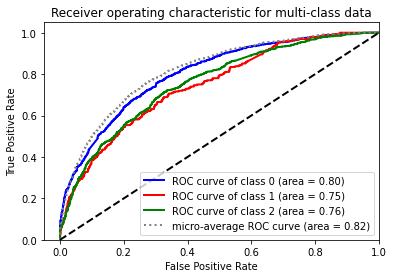

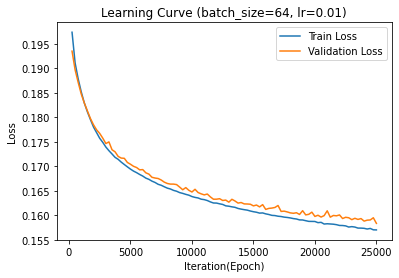

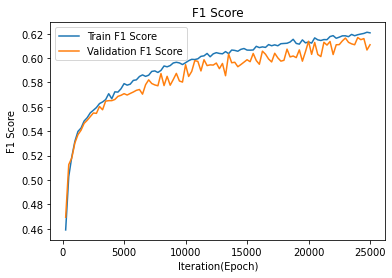

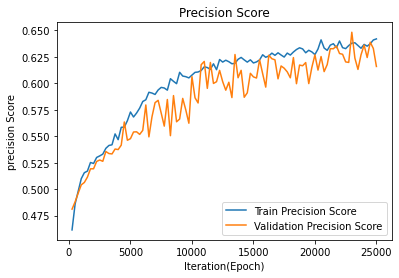

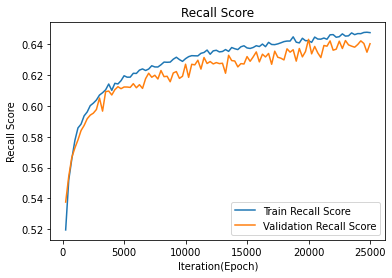

In [ ]:
y_pred = model(XVal)
# scores = nn.functional.softmax(y_pred, dim=1)
# print(YVal.shape)
# print(y_pred.shape)
fpr0 , tpr0, t0 = roc_curve(YVal.detach().numpy()[:,0],y_pred.detach().numpy()[:,0])
roc_auc0 = auc(fpr0, tpr0)
fpr1 , tpr1, t1 = roc_curve(YVal.detach().numpy()[:,1],y_pred.detach().numpy()[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2 , tpr2, t2 = roc_curve(YVal.detach().numpy()[:,2],y_pred.detach().numpy()[:,2])
roc_auc2 = auc(fpr2, tpr2)

fprmicro , tprmicro, tmicro = roc_curve(YVal.ravel().detach().numpy(),y_pred.ravel().detach().numpy())
roc_aucmicro = auc(fprmicro, tprmicro)

# array_fpr = [fpr0,fpr1,fpr2]
# all_fpr = np.unique(np.concatenate([array_fpr[i] for i in range(3)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(3):
#     mean_tpr += np.interp(all_fpr, array_fpr[i], array_fpr[i])

# # Finally average it and compute AUC
# mean_tpr /= 3

# fprmacro = all_fpr
# tprmacro = mean_tpr
# roc_aucmacro = auc(fprmacro, tprmacro)
# print(fprmacro)

plt.plot(fpr0, tpr0, color='blue', lw=2,label='ROC curve of class 0 (area = {0:0.2f})'
''.format(roc_auc0))
plt.plot(fpr1, tpr1, color='red', lw=2,label='ROC curve of class 1 (area = {0:0.2f})'
''.format(roc_auc1))
plt.plot(fpr2, tpr2, color='green', lw=2,label='ROC curve of class 2 (area = {0:0.2f})'
''.format(roc_auc2))
plt.plot(fprmicro, tprmicro,':', color='grey', lw=2,label='micro-average ROC curve (area = {0:0.2f})'
''.format(roc_aucmicro))
# plt.plot(fprmacro, tprmacro,'k-.', color='grey', lw=2,label='macro-average ROC curve (area = {0:0.2f})'
# ''.format(roc_aucmacro))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

plt.title("Learning Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
plt.plot(iters, losses, label="Train Loss")
plt.plot(iters, losses_Val, label="Validation Loss")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

plt.title("F1 Score")
plt.plot(iters, f1_train_scores, label="Train F1 Score")
plt.plot(iters, f1_train_scores_Val, label="Validation F1 Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("F1 Score")
plt.legend(loc='best')
plt.show()

plt.title("Precision Score")
plt.plot(iters, precision_train_scores, label="Train Precision Score")
plt.plot(iters, precision_train_scores_Val, label="Validation Precision Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("precision Score")
plt.legend(loc='best')
plt.show()

plt.title("Recall Score")
plt.plot(iters, recall_train_scores, label="Train Recall Score")
plt.plot(iters, recall_train_scores_Val, label="Validation Recall Score")
plt.xlabel("Iteration(Epoch)")
plt.ylabel("Recall Score")
plt.legend(loc='best')
plt.show()